In [ ]:
#############################################################################
#   PROJET 6 - Classez des images à l'aide d'algorithmes de Deep Learning   #
#---------------------------------------------------------------------------#
#   NOTEBOOK DU PROGRAMME DE PREDICTION RACE SUR DONNEES DE TEST            #
#############################################################################

In [ ]:
#############################################################################
# PLAN CODE :                                                               #
#############################################################################
# 1. Chargement fichiers
# 2. Prédiction sur les données de test
#    2.1. West_Highland_white_terrier
#    2.2. Otterhound
#    2.3. Black-and-tan_coonhound
#    2.4. Peluche chien 1
#    2.5. Peluche chien 2

In [16]:
import tensorflow as tf
import re
from tensorflow.keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

In [3]:
C_DATASET                                = './data/'
C_BNDBOX_CLEANED_CARRE                   = C_DATASET + 'bndbox_cleaned_carre/'
C_BNDBOX_CLEANED_CARRE_IMAGES_LUMINOSITE = C_BNDBOX_CLEANED_CARRE + 'Images_luminosite/'

# 1. Chargement fichiers

In [4]:
folder_source_gs = C_BNDBOX_CLEANED_CARRE_IMAGES_LUMINOSITE
img_side_gs      = 200

In [98]:
########################################################
# Chargement modèle avec les meilleurs hyperparamètres #
########################################################
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
#best_model = pickle.load(open(folder_source_gs + 'best_model.pkl', 'rb'))

In [11]:
# https://stackoverflow.com/questions/65697623/tensorflow-warning-found-untraced-functions-such-as-lstm-cell-6-layer-call-and
best_model = tf.keras.models.load_model(folder_source_gs + 'best_model.tf') # load model and point out the custom_object

In [ ]:
########################################################
# Chargement races de chiens                           #
########################################################

In [58]:
f_dog_classes = open(C_DATASET + 'le_gs_classes_.txt', 'r')
dog_classes = f_dog_classes.read()
print(dog_classes)

Afghan_hound
African_hunting_dog
Airedale
American_Staffordshire_terrier
Appenzeller
Australian_terrier
Bedlington_terrier
Bernese_mountain_dog
Blenheim_spaniel
Border_collie
Border_terrier
Boston_bull
Bouvier_des_Flandres
Brabancon_griffon
Brittany_spaniel
Cardigan
Chesapeake_Bay_retriever
Chihuahua
Dandie_Dinmont
Doberman
English_foxhound
English_setter
English_springer
EntleBucher
Eskimo_dog
French_bulldog
German_shepherd
German_short-haired_pointer
Gordon_setter
Great_Dane
Great_Pyrenees
Greater_Swiss_Mountain_dog
Ibizan_hound
Irish_setter
Irish_terrier
Irish_water_spaniel
Irish_wolfhound
Italian_greyhound
Japanese_spaniel
Kerry_blue_terrier
Labrador_retriever
Lakeland_terrier
Leonberg
Lhasa
Maltese_dog
Mexican_hairless
Newfoundland
Norfolk_terrier
Norwegian_elkhound
Norwich_terrier
Old_English_sheepdog
Pekinese
Pembroke
Pomeranian
Rhodesian_ridgeback
Rottweiler
Saint_Bernard
Saluki
Samoyed
Scotch_terrier
Scottish_deerhound
Sealyham_terrier
Shetland_sheepdog
Shih-Tzu
Siberian_husky

In [66]:
# https://pythonforge.com/lire-ou-ecrire-dans-un-fichier-avec-python/
with open(C_DATASET + 'le_gs_classes_.txt', 'r') as fichier:
    contenu = fichier.readlines()
print(contenu)

['Afghan_hound\n', 'African_hunting_dog\n', 'Airedale\n', 'American_Staffordshire_terrier\n', 'Appenzeller\n', 'Australian_terrier\n', 'Bedlington_terrier\n', 'Bernese_mountain_dog\n', 'Blenheim_spaniel\n', 'Border_collie\n', 'Border_terrier\n', 'Boston_bull\n', 'Bouvier_des_Flandres\n', 'Brabancon_griffon\n', 'Brittany_spaniel\n', 'Cardigan\n', 'Chesapeake_Bay_retriever\n', 'Chihuahua\n', 'Dandie_Dinmont\n', 'Doberman\n', 'English_foxhound\n', 'English_setter\n', 'English_springer\n', 'EntleBucher\n', 'Eskimo_dog\n', 'French_bulldog\n', 'German_shepherd\n', 'German_short-haired_pointer\n', 'Gordon_setter\n', 'Great_Dane\n', 'Great_Pyrenees\n', 'Greater_Swiss_Mountain_dog\n', 'Ibizan_hound\n', 'Irish_setter\n', 'Irish_terrier\n', 'Irish_water_spaniel\n', 'Irish_wolfhound\n', 'Italian_greyhound\n', 'Japanese_spaniel\n', 'Kerry_blue_terrier\n', 'Labrador_retriever\n', 'Lakeland_terrier\n', 'Leonberg\n', 'Lhasa\n', 'Maltese_dog\n', 'Mexican_hairless\n', 'Newfoundland\n', 'Norfolk_terrier\

In [77]:
# https://pythonforge.com/lire-ou-ecrire-dans-un-fichier-avec-python/
# Suppression des retours chariots
dog_classes = []
for ligne in contenu:
    ligne = re.sub(r"\n", "", ligne)
    dog_classes.append(ligne)
print(dog_classes)

['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog', 'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Mexican_hairless', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pekinese', 'Pembroke', 'Po

In [79]:
print('dog_classes[0]\t\t=', dog_classes[0])
print('dog_classes[3]\t\t=', dog_classes[3])
print('dog_classes[119]\t=', dog_classes[119])

dog_classes[0]		= Afghan_hound
dog_classes[3]		= American_Staffordshire_terrier
dog_classes[119]	= wire-haired_fox_terrier


# 2. Prédiction sur les données de test

In [344]:
# https://stackoverflow.com/questions/63703280/how-to-predict-a-single-image-with-keras-imagedatagenerator
def prediction(img_path_in):

    img = image.load_img(img_path_in, target_size = (img_side_gs, img_side_gs))
    
    # convert to array so that we can pass into preprocess_function
    img = image.img_to_array(img)
    
    # preprocess using the same function used for training
    img = preprocess_input(img, data_format = None)
    
    # we rescale/normalize the pixel <=> normalize image
    img = img/255.0
    # transform image array to a tensor
    img = np.expand_dims(img, axis = 0)

    y_pred = best_model.predict(img)
    print('prédiction', img_path_in, ':\n\n', y_pred)
    
    return y_pred

In [345]:
############################################
# 3 meilleures prédictions                 #
############################################
def meilleures_predictions(img_path_in, y_pred_in):
    max_ = max(y_pred_in[0])
    #print(max_)
    #print(np.where(y_pred == max_))

    # indices des 5 meilleures prédictions
    ind_best = np.argpartition(y_pred_in[0], -5)[-5:] 
    #print(ind_best)

    print('5 meilleures prédictions pour', img_path_in, ':')
    for i in np.arange(0, len(ind_best)):
        indice     = ind_best[i]
        percentage = y_pred_in[0][indice]
        race       = dog_classes[indice]
        
        if (percentage == max_):
            label_max = '<== max'
        else:
            label_max = ''
        print(indice, '\t', percentage, '\t', race, '\t', label_max)
        
    return ind_best

In [346]:
####################################################
# Recherche aléatoire d'un chien d'une race donnée #
# (on renvoie le 10ième)                           #
####################################################
def random_dog_with_breed(race_in):
    liste_file_folder = os.listdir(folder_source_gs)

    # Liste des répertoires et sous-répertoires du répertoire source
    for rep in liste_file_folder:
        path = folder_source_gs + rep
       
        if (race_in in path):
#            print(path)
            liste_dir_images = os.listdir(path)     
#            print(liste_dir_images[10])
        
            path_image_pred = path + '/' + liste_dir_images[10]
#            print(path_image_pred)
        
            im_pred = Image.open(path_image_pred)

            return path_image_pred

In [347]:
#########################################################
# Affichage image d'origine et 3 meilleures prédictions #
#########################################################
def affichage(img_path_in, ind_best_predictions):


    fig = plt.figure(figsize = (14, 3.5)) # longueur, hauteur
    fig.suptitle(t = 'Affichage image d\'origine et 3 meilleures prédictions', fontsize = 15, color = 'green')

    # Image origine
    plt.subplot(1, 4, 1)
    im_origine = Image.open(img_path_in)
    plt.imshow(im_origine)
    
    # Extrait nom race : ./data/West_Highland_white_terrier_201.jpg --> West_Highland_white_terrier
    newstring = re.sub(r"[0-9]+", "", img_path_in) # on enlève les chiffres
    newstring = newstring[7:len(newstring)-5] # on enlève './data/' au début et '_.jpg' à la fin
    plt.xlabel('origine : ' + newstring)

    # Images des 3 races prédites (on supprime Bouvier_des_Flandres & Irish_water_spaniel trop présentes dans 
    # les prédictions, car sous dataset pour prédictions)
    id_subplot = 2
    for i in np.arange(0, len(ind_best_predictions)):

        indice = ind_best_predictions[i]
        if ((indice != 12) &    # Bouvier_des_Flandres
            (indice != 35) &    # Irish_water_spaniel
            (id_subplot <= 4)): # dernier subplot = n°4
            
            plt.subplot(1, 4, id_subplot)
            race   = dog_classes[indice]
        
            # Recherche aléatoire d'un chien de cette race
            path_image_pred = random_dog_with_breed(race_in = race)
        
            im_pred = Image.open(path_image_pred)
            plt.imshow(im_pred)    
            plt.xlabel(race)        
            id_subplot = id_subplot + 1

    fig.tight_layout()  # Espace entre les subplots
    # Display the plot
    plt.show()

# 2.1. West_Highland_white_terrier

In [348]:
img_path_201 = './data/West_Highland_white_terrier_201.jpg'

In [349]:
y_pred_201 = prediction(img_path_in = img_path_201)

1/1 [==============================] - 4s 4s/step
prédiction ./data/West_Highland_white_terrier_201.jpg :

 [[0.63852125 0.4607484  0.5090729  0.56847566 0.38914835 0.35332322
  0.6707692  0.3454038  0.43963146 0.41449097 0.40629232 0.5589363
  0.8379554  0.48668715 0.350948   0.34818774 0.66481185 0.34562275
  0.5300035  0.33490935 0.5594539  0.480018   0.43937242 0.36467946
  0.58765876 0.5362412  0.35386625 0.45574322 0.47555706 0.41768247
  0.4501569  0.47535658 0.38675937 0.47891384 0.46833244 0.7407806
  0.54135114 0.49755132 0.4770476  0.72683805 0.50617546 0.5405449
  0.5589906  0.5199231  0.5291892  0.4719341  0.6259924  0.41082
  0.4718051  0.2908073  0.5762647  0.55031693 0.24217986 0.41252294
  0.53488433 0.41313165 0.46523866 0.47487175 0.42041355 0.64258695
  0.5350018  0.4542111  0.4078468  0.5803508  0.71453756 0.570826
  0.5704845  0.5266741  0.5684228  0.4587317  0.48768303 0.43121815
  0.40942386 0.4756139  0.64471275 0.4529386  0.39077365 0.5002799
  0.6285297  0.63

In [350]:
ind_best_201 = meilleures_predictions(img_path_in = img_path_201,
                                      y_pred_in   = y_pred_201)

print('\nind_best_201 =', ind_best_201)

5 meilleures prédictions pour ./data/West_Highland_white_terrier_201.jpg :
104 	 0.7148063 	 miniature_poodle 	 
115 	 0.7252577 	 toy_poodle 	 
12 	 0.8379554 	 Bouvier_des_Flandres 	 <== max
35 	 0.7407806 	 Irish_water_spaniel 	 
39 	 0.72683805 	 Kerry_blue_terrier 	 

ind_best_201 = [104 115  12  35  39]


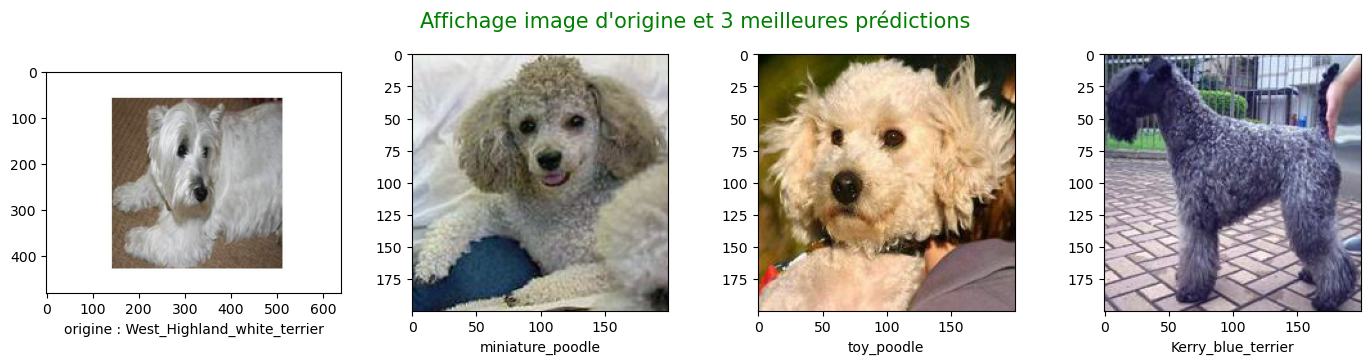

In [351]:
affichage(img_path_in          = img_path_201, 
          ind_best_predictions = ind_best_201)

# 2.2. Otterhound

In [352]:
img_path_554 = './data/otterhound_554.jpg'

In [353]:
y_pred_554 = prediction(img_path_in = img_path_554)

1/1 [==============================] - 4s 4s/step
prédiction ./data/otterhound_554.jpg :

 [[0.66117644 0.43814448 0.53308564 0.63808143 0.40272555 0.44373515
  0.68046665 0.35420054 0.387662   0.36692268 0.41900307 0.49814013
  0.8666289  0.50873363 0.3520321  0.29984424 0.6369165  0.33131158
  0.58276504 0.30862704 0.55254436 0.47843668 0.43975952 0.41726074
  0.54796773 0.50846314 0.31912813 0.43613467 0.48595187 0.40244457
  0.4065814  0.5001261  0.3923151  0.44951984 0.5056985  0.7755564
  0.55774224 0.45173132 0.4285209  0.7245301  0.51263654 0.58615077
  0.539031   0.49881947 0.57725376 0.47559333 0.63445866 0.47881952
  0.3914563  0.31745905 0.6063818  0.5305198  0.2403476  0.44196528
  0.5612719  0.43383607 0.44526947 0.48212552 0.4186719  0.6685493
  0.52867436 0.4673594  0.3855409  0.544384   0.6542999  0.60107964
  0.55444026 0.5402221  0.5726586  0.43397117 0.45553052 0.38616306
  0.4247668  0.5445408  0.63726795 0.47468713 0.39362922 0.44100484
  0.59040594 0.6137759  0.4

In [354]:
ind_best_554 = meilleures_predictions(img_path_in = img_path_554,
                                      y_pred_in   = y_pred_554)

print('\nind_best_554 =', ind_best_554)

5 meilleures prédictions pour ./data/otterhound_554.jpg :
39 	 0.7245301 	 Kerry_blue_terrier 	 
35 	 0.7755564 	 Irish_water_spaniel 	 
12 	 0.8666289 	 Bouvier_des_Flandres 	 <== max
115 	 0.78505814 	 toy_poodle 	 
104 	 0.7432567 	 miniature_poodle 	 

ind_best_554 = [ 39  35  12 115 104]


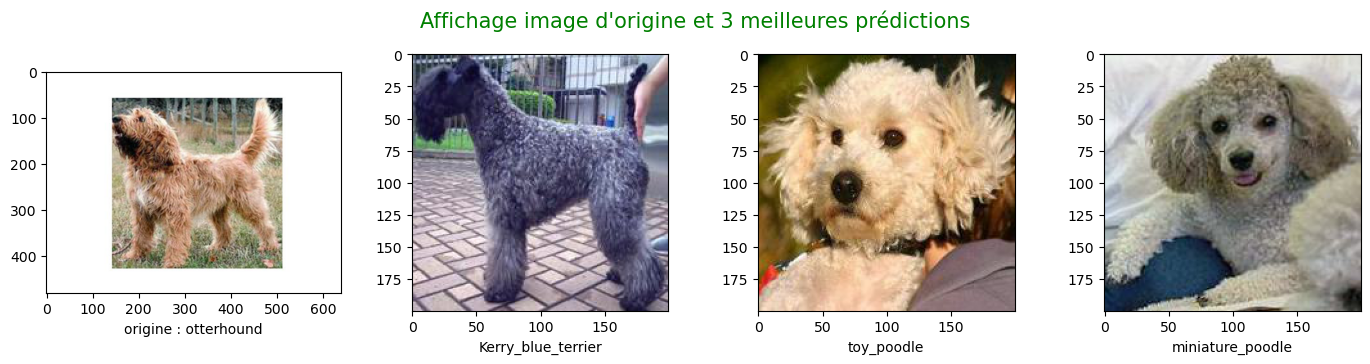

In [355]:
affichage(img_path_in          = img_path_554, 
          ind_best_predictions = ind_best_554)

# 2.3. Black-and-tan_coonhound

In [356]:
img_path_black_and_tan_coonhound_725 = './data/black-and-tan_coonhound_725.jpg'

In [357]:
y_pred_black_and_tan_coonhound_725 = prediction(img_path_in = img_path_black_and_tan_coonhound_725)

1/1 [==============================] - 4s 4s/step
prédiction ./data/black-and-tan_coonhound_725.jpg :

 [[0.6753236  0.5522825  0.45074546 0.49585494 0.3244694  0.41296542
  0.64772236 0.38189214 0.43284565 0.39504626 0.29440922 0.52591914
  0.74963295 0.5087821  0.36093917 0.33108976 0.6209437  0.4189526
  0.54134643 0.31723532 0.5079714  0.53490555 0.4600153  0.39472178
  0.66206133 0.5436192  0.3173717  0.42077044 0.37148792 0.38740414
  0.39839998 0.5297736  0.39344603 0.52544254 0.47748396 0.72214574
  0.5214908  0.44919786 0.43322605 0.6491733  0.49074674 0.48270687
  0.5347579  0.50644135 0.540475   0.53377944 0.742805   0.3609428
  0.47664037 0.31099284 0.6281404  0.5743857  0.28197065 0.55681616
  0.40827382 0.38191983 0.35279283 0.49041453 0.4854798  0.7040428
  0.5100581  0.48134977 0.4034147  0.5560801  0.73274773 0.49943146
  0.6084033  0.5609559  0.46473512 0.4069848  0.42927644 0.43072608
  0.4663562  0.48667476 0.66884005 0.5036911  0.53732306 0.43956017
  0.49695015 0.

In [358]:
ind_best_black_and_tan_coonhound_725 = meilleures_predictions(img_path_in = img_path_black_and_tan_coonhound_725,
                                                              y_pred_in   = y_pred_black_and_tan_coonhound_725)

print('\nind_best_black_and_tan_coonhound_725 =', ind_best_black_and_tan_coonhound_725)

5 meilleures prédictions pour ./data/black-and-tan_coonhound_725.jpg :
96 	 0.73871344 	 groenendael 	 
46 	 0.742805 	 Newfoundland 	 
12 	 0.74963295 	 Bouvier_des_Flandres 	 
115 	 0.7543829 	 toy_poodle 	 
104 	 0.7867405 	 miniature_poodle 	 <== max

ind_best_black_and_tan_coonhound_725 = [ 96  46  12 115 104]


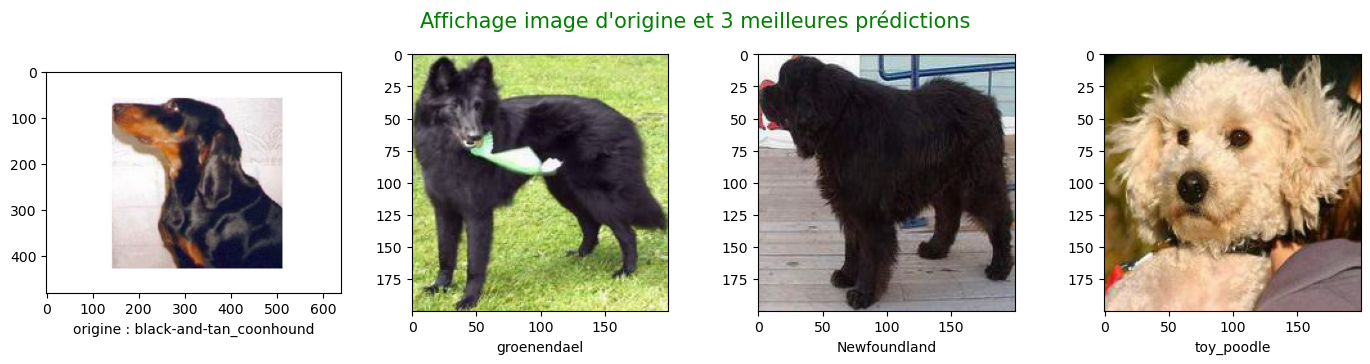

In [359]:
affichage(img_path_in          = img_path_black_and_tan_coonhound_725, 
          ind_best_predictions = ind_best_black_and_tan_coonhound_725)

# 2.4. Peluche chien 1

In [360]:
img_path_peluche_1 = './data/peluche_chien_1.jpg'

In [361]:
y_pred_peluche_1 = prediction(img_path_in = img_path_peluche_1)

1/1 [==============================] - 4s 4s/step
prédiction ./data/peluche_chien_1.jpg :

 [[0.58258975 0.48865682 0.5162491  0.5989282  0.42563385 0.38579383
  0.5344684  0.42537457 0.39057994 0.4391357  0.3513373  0.5134228
  0.7764464  0.5629003  0.3840738  0.35103855 0.65789205 0.37894765
  0.46862575 0.32294965 0.5095597  0.5206454  0.4696773  0.43027663
  0.6434017  0.4967173  0.3712785  0.45686927 0.4664192  0.4429943
  0.50920236 0.48702955 0.4314301  0.5914248  0.5486484  0.75384676
  0.4941795  0.46230832 0.3906559  0.6640996  0.58147675 0.4507369
  0.6120297  0.4673747  0.55016124 0.4455362  0.7440703  0.4354081
  0.44884408 0.3462555  0.56700236 0.4835432  0.29494646 0.48907706
  0.5396808  0.44648975 0.48521784 0.48956895 0.5282031  0.62332374
  0.459652   0.3893623  0.38105398 0.46806723 0.6999932  0.5313451
  0.6068246  0.66610646 0.451009   0.36681756 0.45979998 0.36222345
  0.46447593 0.3866155  0.53208447 0.4582153  0.46866444 0.4598587
  0.580656   0.6794989  0.5058

In [362]:
ind_best_peluche_1 = meilleures_predictions(img_path_in = img_path_peluche_1,
                                            y_pred_in   = y_pred_peluche_1)

print('\nind_best_peluche_1 =', ind_best_peluche_1)

5 meilleures prédictions pour ./data/peluche_chien_1.jpg :
64 	 0.6999932 	 Siberian_husky 	 
35 	 0.75384676 	 Irish_water_spaniel 	 
12 	 0.7764464 	 Bouvier_des_Flandres 	 <== max
46 	 0.7440703 	 Newfoundland 	 
96 	 0.7177075 	 groenendael 	 

ind_best_peluche_1 = [64 35 12 46 96]


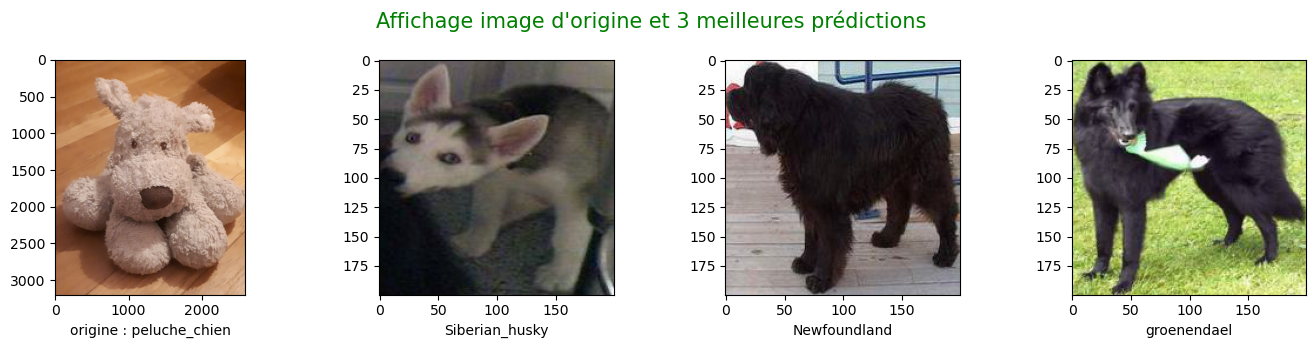

In [363]:
affichage(img_path_in          = img_path_peluche_1, 
          ind_best_predictions = ind_best_peluche_1)

# 2.5. Peluche chien 2

In [364]:
img_path_peluche_2 = './data/peluche_chien_2.jpg'

In [365]:
y_pred_peluche_2 = prediction(img_path_in = img_path_peluche_2)

1/1 [==============================] - 4s 4s/step
prédiction ./data/peluche_chien_2.jpg :

 [[0.509147   0.48879632 0.5314438  0.6556424  0.4212615  0.38127977
  0.548463   0.42569384 0.40252542 0.42486185 0.32839203 0.54052895
  0.77537477 0.5640495  0.38004228 0.35025427 0.67177653 0.40578812
  0.4970494  0.3433298  0.5309844  0.50092494 0.46615413 0.44751027
  0.6589331  0.57630664 0.33925366 0.45163396 0.43619123 0.46132338
  0.43076286 0.53836817 0.46327984 0.5709451  0.5438799  0.728828
  0.4371518  0.44973907 0.40452984 0.67066896 0.56303596 0.48929057
  0.53162926 0.46673566 0.59315616 0.50180024 0.69548154 0.38362703
  0.44092777 0.33894747 0.60185575 0.48798728 0.26173416 0.5396375
  0.58687854 0.45458093 0.43658322 0.47295588 0.51150334 0.650892
  0.42962965 0.4105097  0.3827098  0.47103468 0.7259138  0.5737271
  0.55151904 0.6191257  0.4764957  0.36866882 0.4775706  0.34123394
  0.47475785 0.42259663 0.51217544 0.4897607  0.45363894 0.4620475
  0.57169807 0.67710453 0.49734

In [366]:
ind_best_peluche_2 = meilleures_predictions(img_path_in = img_path_peluche_2,
                                            y_pred_in   = y_pred_peluche_2)

print('\nind_best_peluche_2 =', ind_best_peluche_2)

5 meilleures prédictions pour ./data/peluche_chien_2.jpg :
46 	 0.69548154 	 Newfoundland 	 
115 	 0.7046377 	 toy_poodle 	 
64 	 0.7259138 	 Siberian_husky 	 
35 	 0.728828 	 Irish_water_spaniel 	 
12 	 0.77537477 	 Bouvier_des_Flandres 	 <== max

ind_best_peluche_2 = [ 46 115  64  35  12]


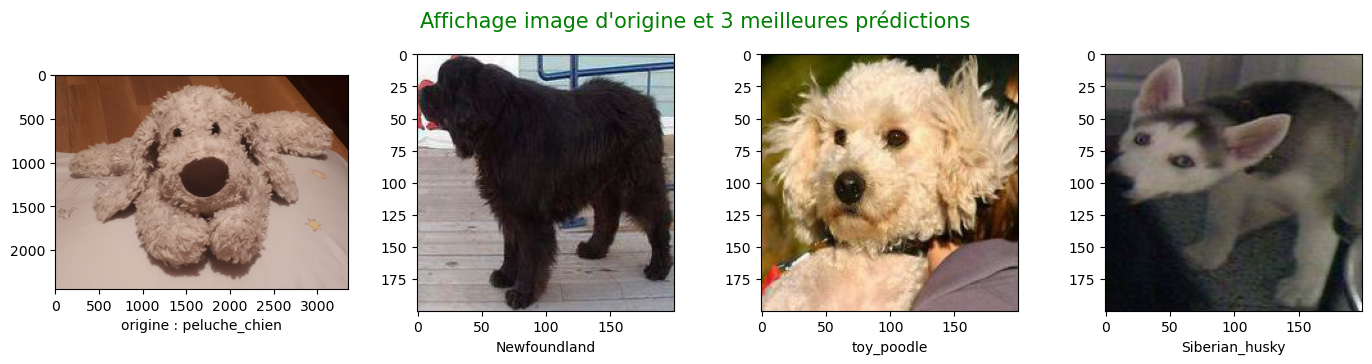

In [367]:
affichage(img_path_in          = img_path_peluche_2, 
          ind_best_predictions = ind_best_peluche_2)